In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Cleaning

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Conclusion: The dataset have missing values in Rating, Type, Content Rating, Current Ver and Android Ver

In [8]:
df.shape

(10841, 13)

In [9]:
df['Reviews'].str.isnumeric().sum()

10840

In [10]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.loc[10472, 'Reviews'] = '3'

In [12]:
df['Reviews'].str.isnumeric().sum()

10841

In [13]:
df['Reviews'] = df['Reviews'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df['Size'] = df['Size'].str.replace('M', '000')
df['Size'] = df['Size'].str.replace('.', '', regex = True)
df['Size'] = df['Size'].str.replace('k', '')
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [17]:
df.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
df.drop(10472, inplace = True)

In [19]:
df['Size'] = df['Size'].astype('float')

In [20]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+04, 2.50e+04, 2.80e+04, 5.60e+04,
       2.90e+04, 3.30e+04, 3.10e+04, 1.20e+04, 2.00e+04, 2.10e+04,
       3.70e+04, 2.70e+04, 5.50e+04, 1.70e+04, 3.90e+04, 4.20e+04,
       7.00e+04, 2.30e+04, 6.00e+04, 6.10e+04, 4.60e+04, 9.20e+04,
       5.20e+04, 1.10e+04, 2.40e+04,      nan, 9.40e+04, 1.50e+04,
       1.00e+04, 2.60e+04, 8.00e+04, 7.90e+04, 5.70e+04, 3.50e+04,
       5.40e+04, 2.01e+02, 3.60e+04, 8.60e+04, 1.60e+04, 3.40e+04,
       8.90e+04, 3.80e+04, 3.20e+04, 1.80e+04, 2.20e+04, 4.50e+04,
       9.80e+04, 9.00e+04, 6.70e+04, 3.00e+04, 7.10e+04, 7.40e+04,
       6.40e+04, 8.20e+04, 9.90e+04, 4.90e+04, 9.50e+04, 5.00e+04,
       5.90e+04, 1.30e+04, 7.30e+04, 6.80e+04, 4.00e+04, 7.20e+04,
       9.10e+04, 2.30e+01, 6.50e+04, 7.50e+04, 5.10e+04, 4.10e+04,
       4.80e+04, 8.50e+04, 8.30e+04, 4.30e+04, 4.70e+04, 7.80e+04,
       8.80e+04, 6.60e+04, 7.90e+01, 8.40e+04, 1.18e+02, 4.40e+04,
       6.95e+02, 6.20e+04, 1.80e+01, 5.30e+04, 5.80e+04, 9.60e

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [22]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
chars_to_remove = ['+', ',', '$']
cols = ['Price', 'Installs']
for col in cols:
    for char in chars_to_remove:
        df[col] = df[col].str.replace(char, "", regex = True)

In [25]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [27]:
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [29]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [31]:
df['Last_Updated_Day'] = df['Last Updated'].dt.day
df['Last_Updated_Month'] = df['Last Updated'].dt.month
df['Last_Updated_Year'] = df['Last Updated'].dt.year

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10840 non-null  object        
 1   Category            10840 non-null  object        
 2   Rating              9366 non-null   float64       
 3   Reviews             10840 non-null  int32         
 4   Size                9145 non-null   float64       
 5   Installs            10840 non-null  int32         
 6   Type                10839 non-null  object        
 7   Price               10840 non-null  float64       
 8   Content Rating      10840 non-null  object        
 9   Genres              10840 non-null  object        
 10  Last Updated        10840 non-null  datetime64[ns]
 11  Current Ver         10832 non-null  object        
 12  Android Ver         10838 non-null  object        
 13  Last_Updated_Day    10840 non-null  int64     

In [33]:
# df.drop('Last Updated', axis = 1, inplace = True)

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# EDA

In [36]:
df[df.duplicated('App')].shape

(1181, 16)

### Conclusion: The dataset have duplicate app entries

In [37]:
df.shape

(10840, 16)

In [38]:
df.drop_duplicates(subset = ['App'], keep = 'first', inplace = True)

In [39]:
df.shape

(9659, 16)

In [40]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Day,Last_Updated_Month,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9659 non-null   object        
 1   Category            9659 non-null   object        
 2   Rating              8196 non-null   float64       
 3   Reviews             9659 non-null   int32         
 4   Size                8432 non-null   float64       
 5   Installs            9659 non-null   int32         
 6   Type                9658 non-null   object        
 7   Price               9659 non-null   float64       
 8   Content Rating      9659 non-null   object        
 9   Genres              9659 non-null   object        
 10  Last Updated        9659 non-null   datetime64[ns]
 11  Current Ver         9651 non-null   object        
 12  Android Ver         9657 non-null   object        
 13  Last_Updated_Day    9659 non-null   int64      

In [42]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [43]:
print("Number of numberic features: ", len(numeric_features))
print("Numeric features: ", numeric_features)

Number of numberic features:  9
Numeric features:  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Last_Updated_Day', 'Last_Updated_Month', 'Last_Updated_Year']


In [44]:
print("Number of categorical features: ", len(categorical_features))
print("Categorical features: ", categorical_features)

Number of categorical features:  7
Categorical features:  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


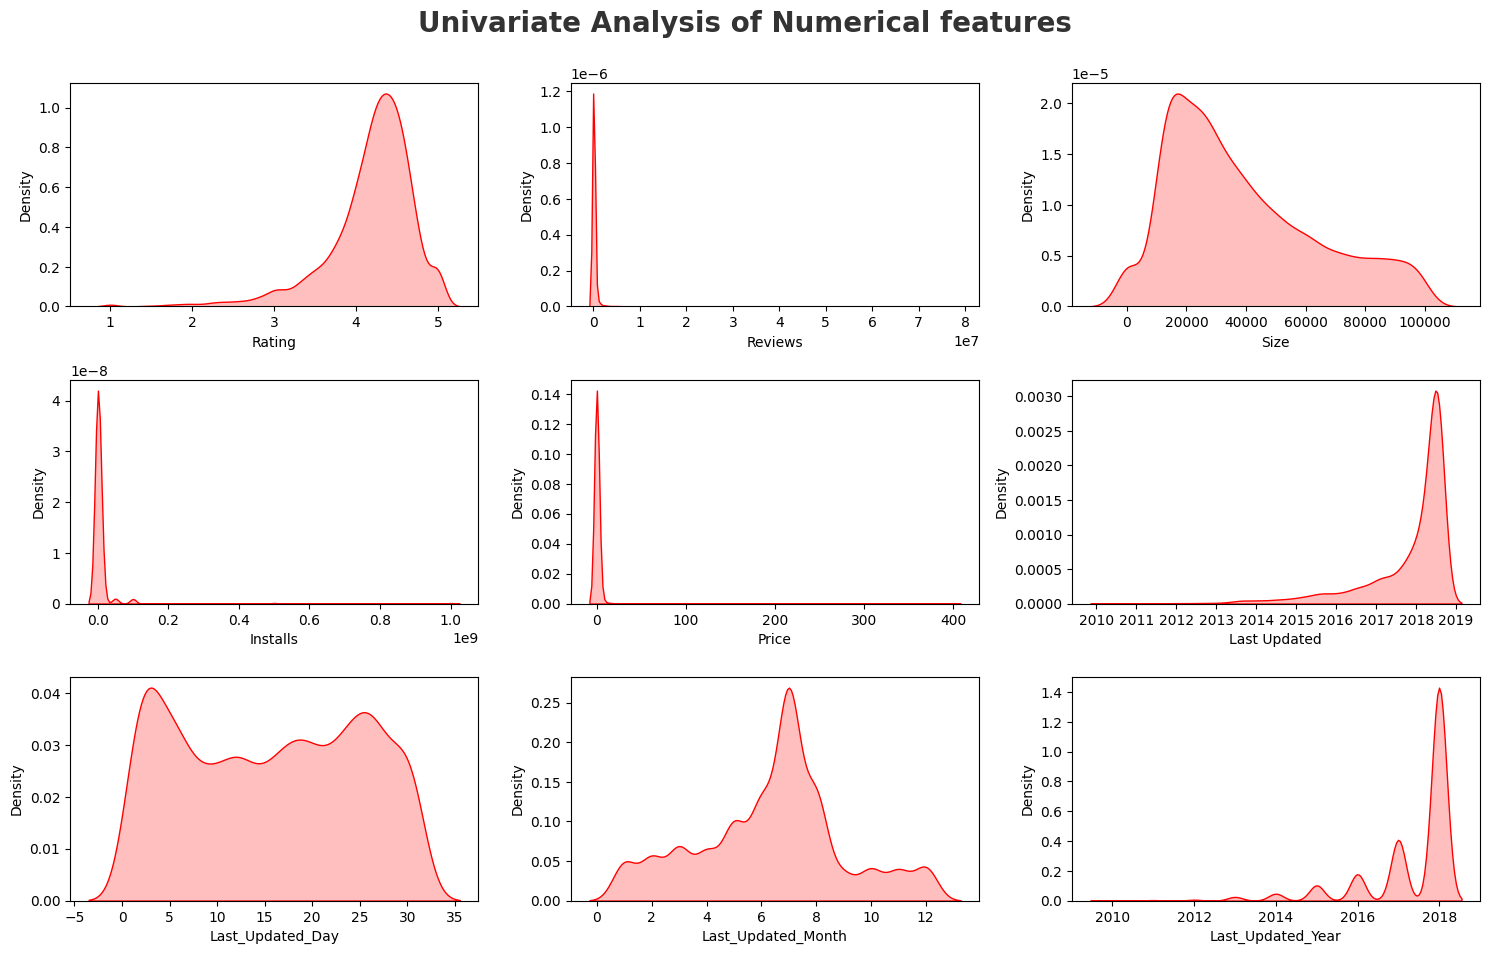

In [54]:
plt.figure(figsize = (15, 15))
plt.suptitle("Univariate Analysis of Numerical features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.0)

for i in range(len(numeric_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(data = df, x = numeric_features[i], fill = True, color = 'r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Conclusion: Rating and Year are right skewed while reviews, Size, Installs, Price and Last Updated are left skewed.

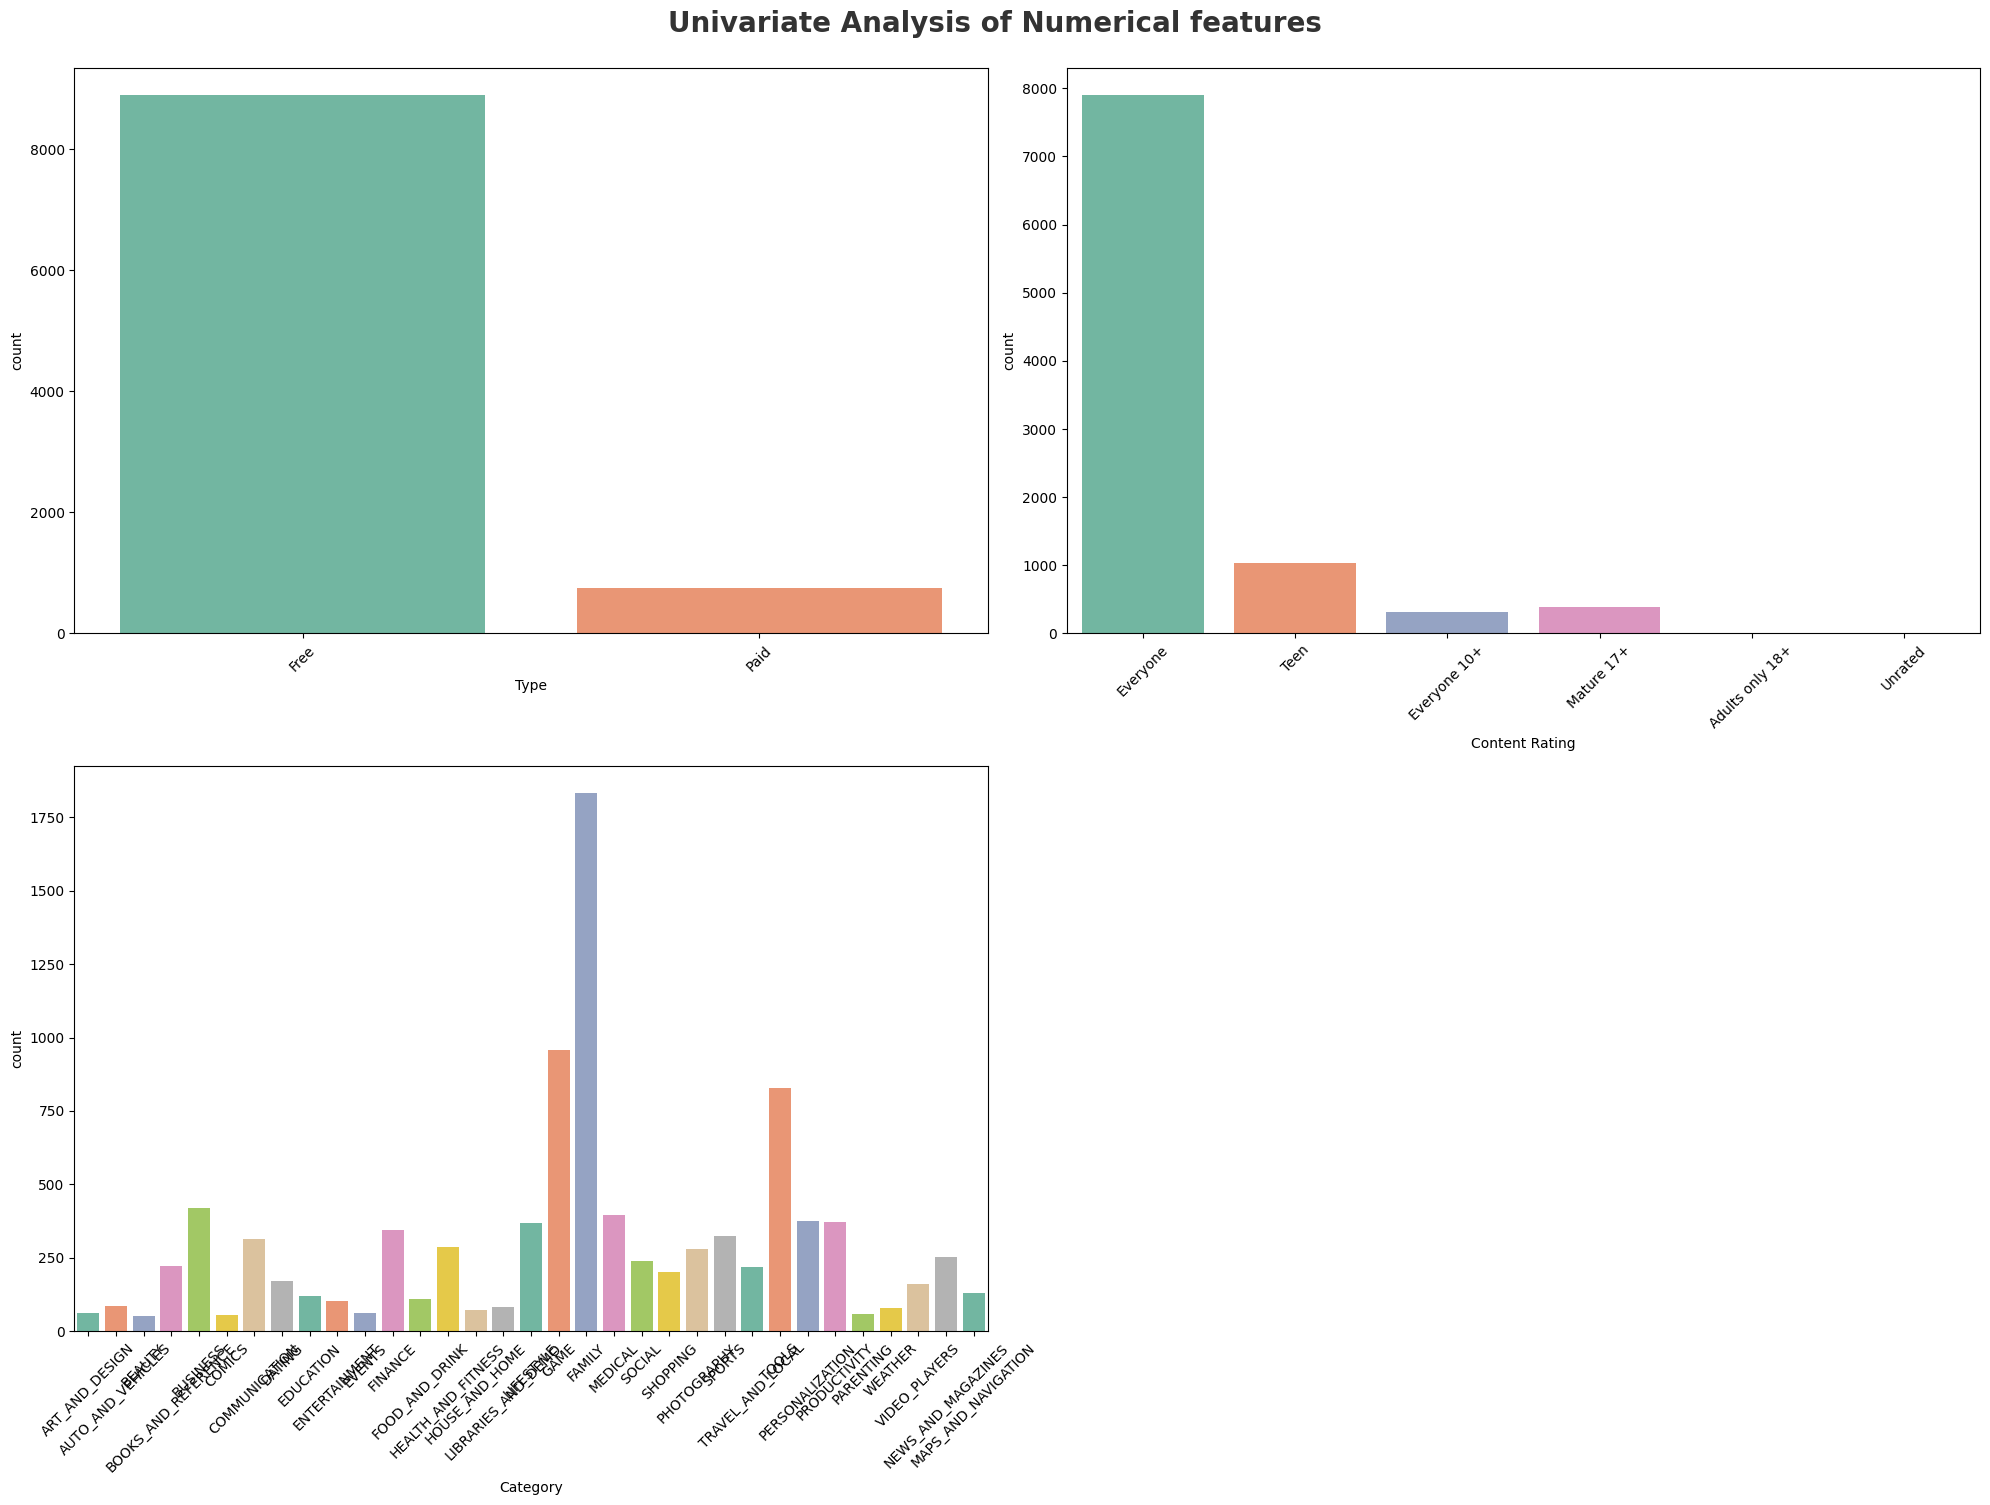

In [57]:
plt.figure(figsize = (20, 15))
plt.suptitle("Univariate Analysis of Numerical features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.0)

category = [ 'Type', 'Content Rating', 'Category']
for i in range(len(category)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data = df, x = category[i], palette = 'Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

## Which is the most popular **Category**?

<Axes: ylabel='Category'>

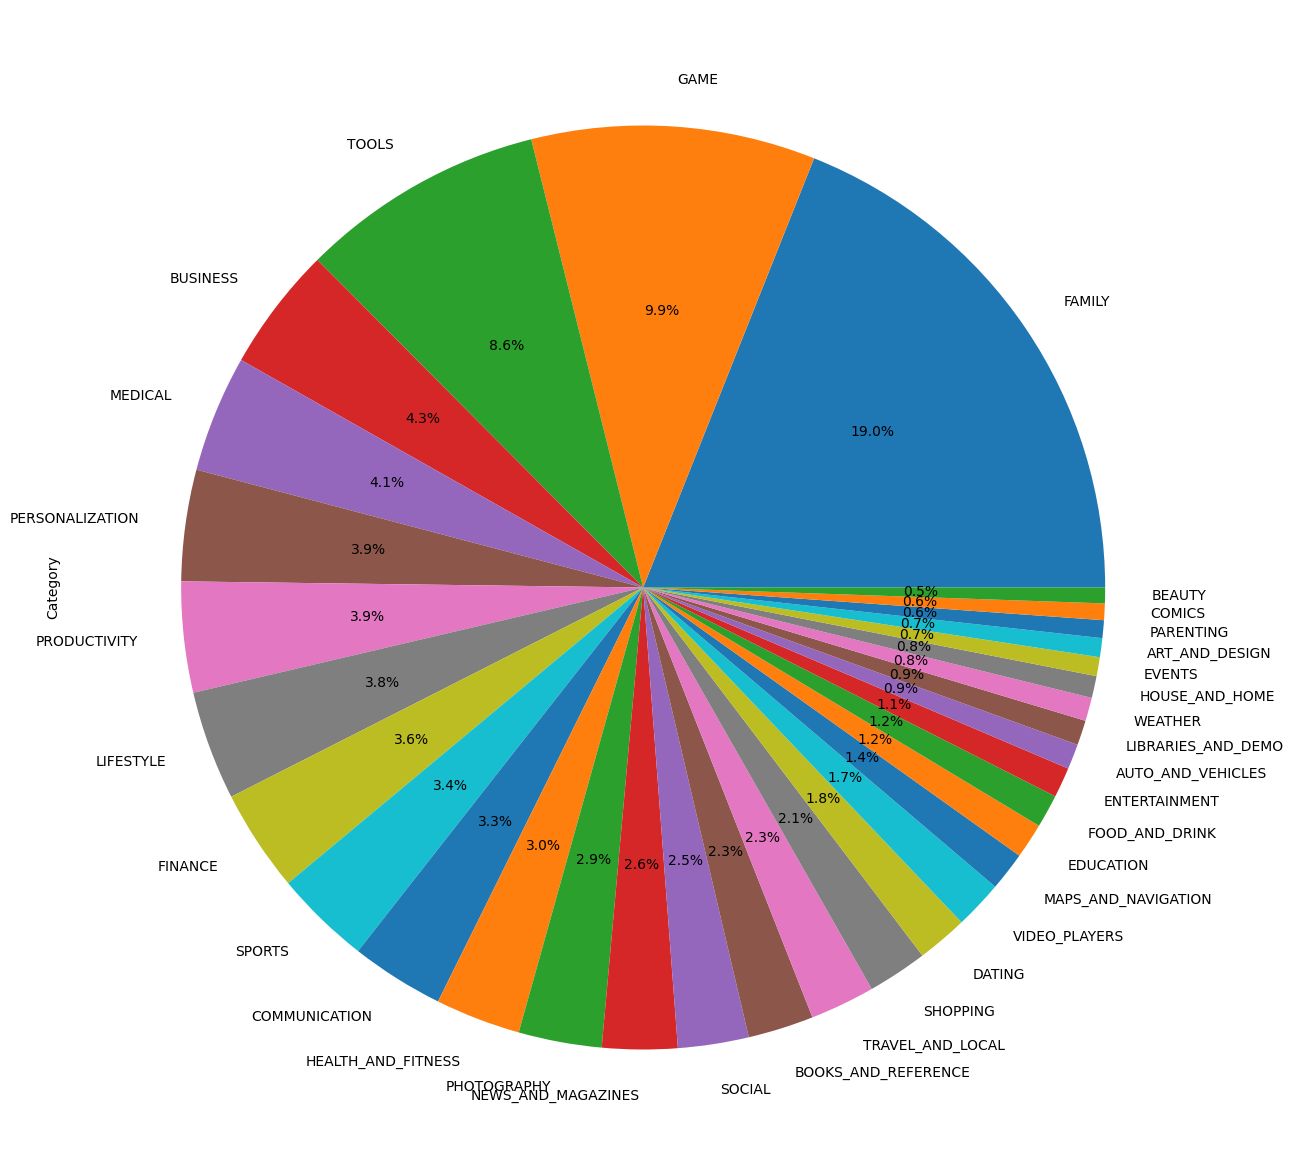

In [58]:
df['Category'].value_counts().plot.pie(figsize = (15, 15), autopct = '%1.1f%%')

### Conclusion
1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

## Top 10 App category

In [59]:
category = pd.DataFrame(df['Category'].value_counts())

In [60]:
category

,Category
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


In [66]:
category.rename(columns = {'Category': 'Count'}, inplace = True)

In [67]:
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


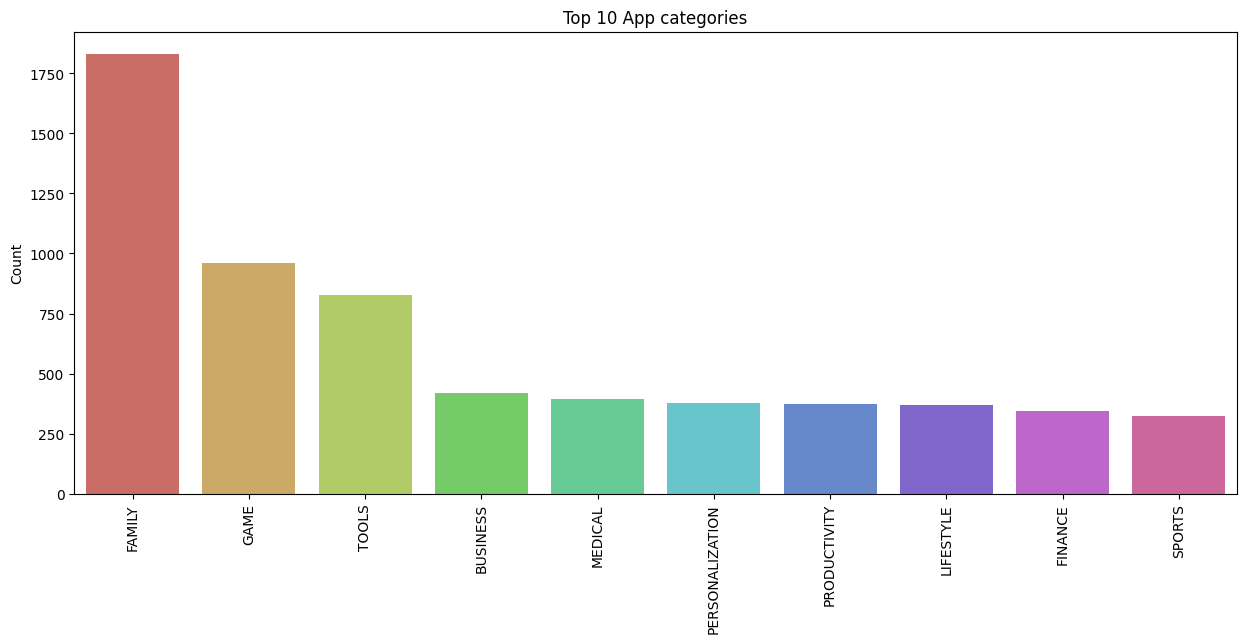

In [68]:
plt.figure(figsize = (15, 6))
sns.barplot(data = category[:10], x = category.index[:10], y = 'Count', palette = 'hls')
plt.title('Top 10 App categories')
plt.xticks(rotation = 90)
plt.show()

### Conclusion
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations?

In [75]:
df_category_wise_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

In [76]:
df_category_wise_installs.Installs = df_category_wise_installs.Installs / 1e9

In [80]:
df_category_wise_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


Text(0.5, 1.0, 'Most popular categories on Play Store: ')

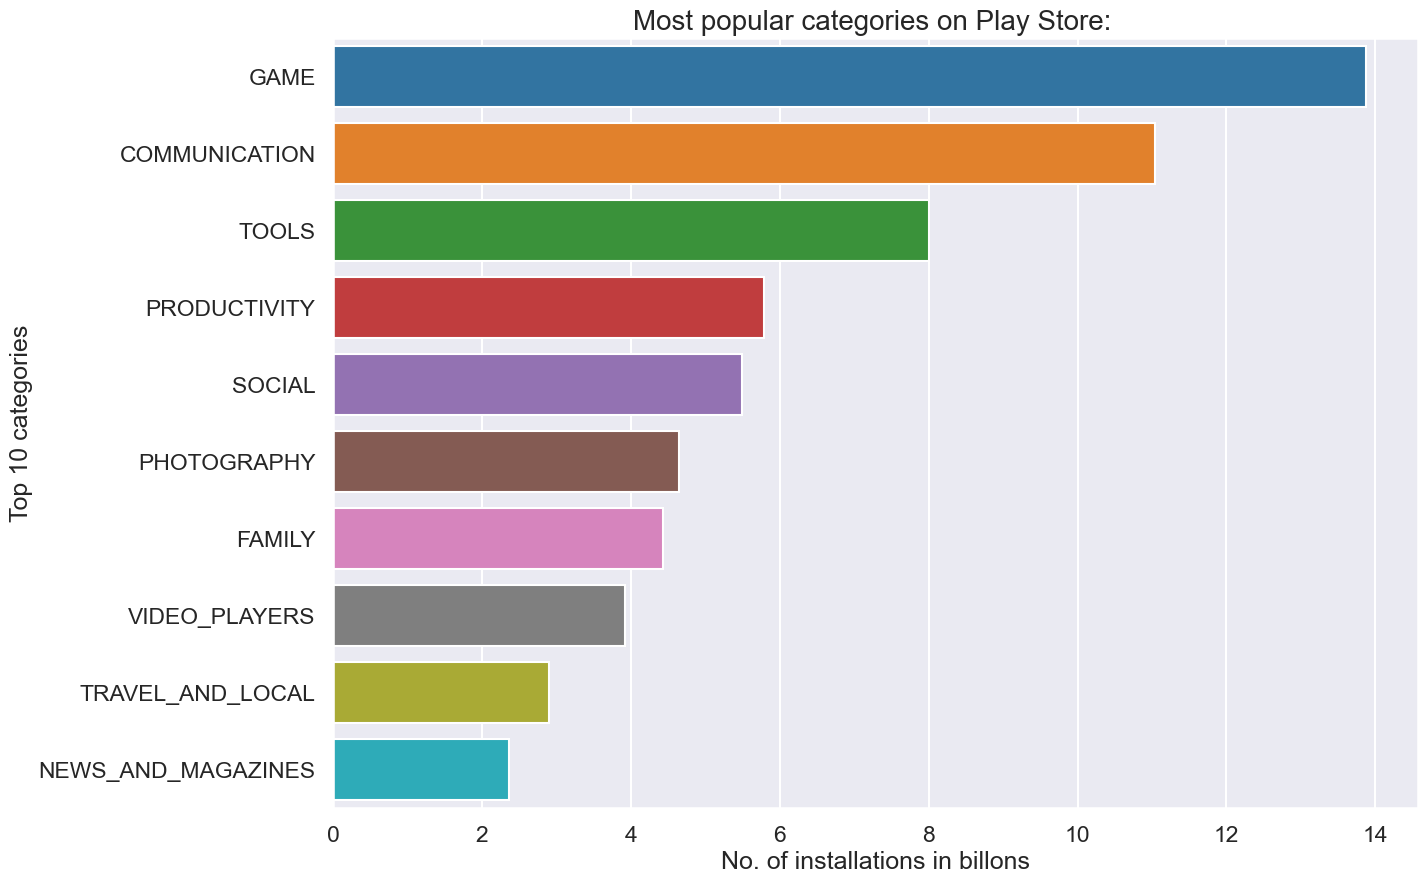

In [77]:
plt.figure(figsize = (14, 10))
sns.set_context('talk')
sns.set_style('darkgrid')

ax = sns.barplot(data = df_category_wise_installs.head(10), x = 'Installs', y = 'Category')
ax.set_xlabel('No. of installations in billons')
ax.set_ylabel('Top 10 categories')
ax.set_title('Most popular categories on Play Store: ', size = 20)

## What are the Top 5 most installed Apps in each popular Categories?

In [81]:
top_categories = df_category_wise_installs.head(10)['Category'].unique()

In [82]:
top_categories

array(['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY', 'FAMILY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL',
       'NEWS_AND_MAGAZINES'], dtype=object)

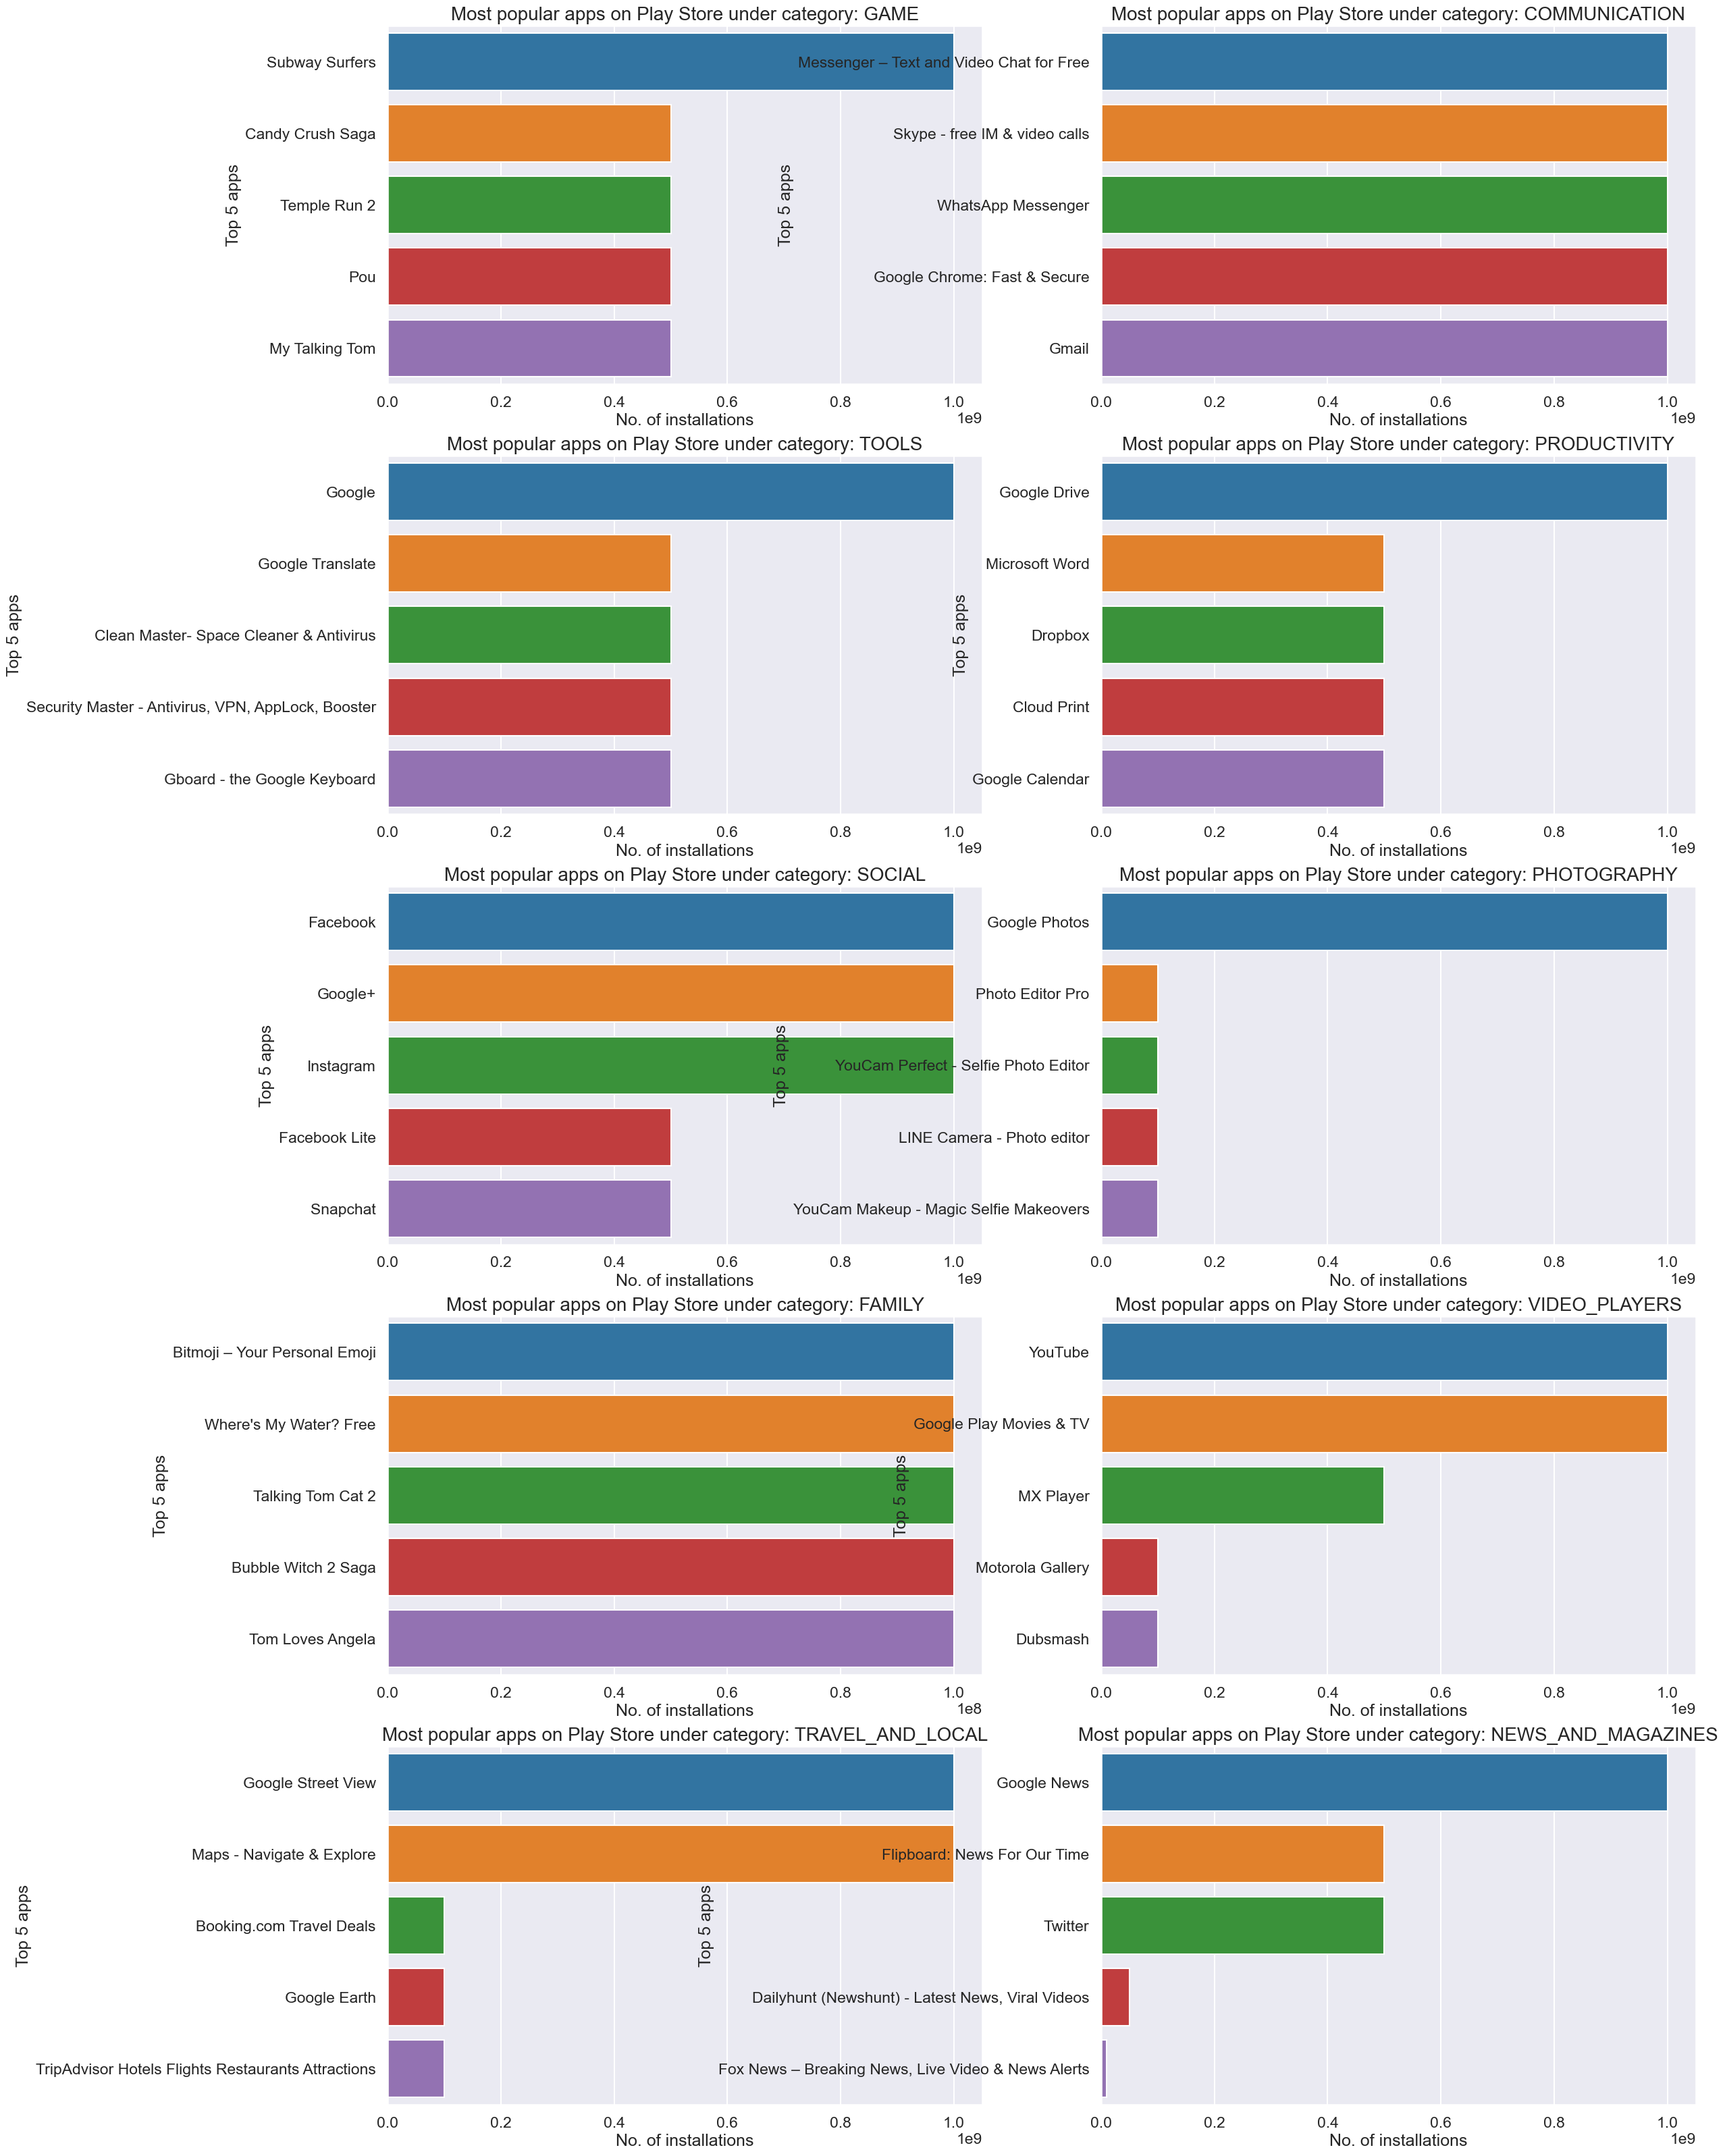

In [87]:
plt.figure(figsize = (25, 40))
sns.set_context('talk')
sns.set_style('darkgrid')

for i in range(len(top_categories)):
    plt.subplot(5, 2, i + 1)
    df_category = df[df['Category'] == top_categories[i]]
    df_apps = df_category.sort_values(by = 'Installs', ascending = False)

    ax = sns.barplot(data = df_apps.head(5), x = 'Installs', y = 'App')
    ax.set_xlabel('No. of installations')
    ax.set_ylabel('Top 5 apps')
    ax.set_title(f'Most popular apps on Play Store under category: {top_categories[i]}', size = 20)
    

## How many apps are there on Google Play Store which get 5 ratings?

In [92]:
df[df['Rating'] == 5.0].shape[0]

271